In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

In [1]:
# Set the working directory
os.chdir("D:/New Download")

# Define the CSV file path
csv_file = "data3.csv"

# Read the CSV file using pandas
data = pd.read_csv(csv_file)

In [ ]:
#Drop the data would not be use
cols_to_drop = ['Time.Stamp']
data = data.drop(cols_to_drop, axis=1)

# Feature would be used in the model

In [4]:
# Check the data infomation to see the type of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Source.IP        int64  
 1   HTTP.Method      int64  
 2   HTTP.Url         int64  
 3   HTTP.Auth        int64  
 4   HTTP.Auth.Hash   int64  
 5   Resource         int64  
 6   Resource.Class   int64  
 7   Resource.Method  int64  
 8   Organization     int64  
 9   App              int64  
 10  Entity           int64  
 11  hour_of_day      int64  
 12  day_of_week      int64  
 13  response_time    float64
 14  Access_Count     int64  
 15  anomaly          int64  
dtypes: float64(1), int64(15)
memory usage: 2.3 GB
None


In [6]:
#check the uniques in our features
unique_counts = data.nunique()
print(unique_counts)

Time.Stamp          851773
Source.IP              461
HTTP.Method             61
HTTP.Url            825222
HTTP.Auth              301
HTTP.Auth.Hash         414
Resource                19
Resource.Class          19
Resource.Method         19
Organization            72
App                     63
Entity                 102
hour_of_day             24
day_of_week              7
response_time      1293154
Access_Count           312
anomaly                  2
dtype: int64


# Random Forest Model

In [5]:
# Convert all categorical variables into numerical format
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Separate features (X) and target variable (y)
X = data.drop('anomaly', axis=1)
y = data['anomaly']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp)

[[ 458652    5694]
 [   5179 3398195]]
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99    464346
           1       1.00      1.00      1.00   3403374

    accuracy                           1.00   3867720
   macro avg       0.99      0.99      0.99   3867720
weighted avg       1.00      1.00      1.00   3867720

HTTP.Method        0.137829
Entity             0.128428
Access_Count       0.101551
response_time      0.099955
HTTP.Url           0.077096
Resource           0.070580
hour_of_day        0.060999
Resource.Method    0.054659
day_of_week        0.053435
HTTP.Auth          0.052743
Resource.Class     0.049823
HTTP.Auth.Hash     0.034048
Source.IP          0.030228
Organization       0.029403
App                0.019223
dtype: float64


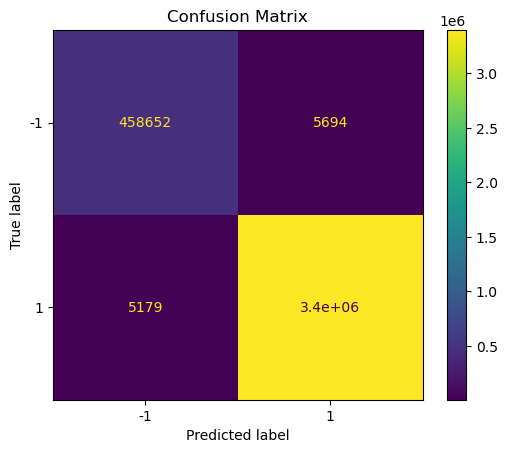

In [6]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

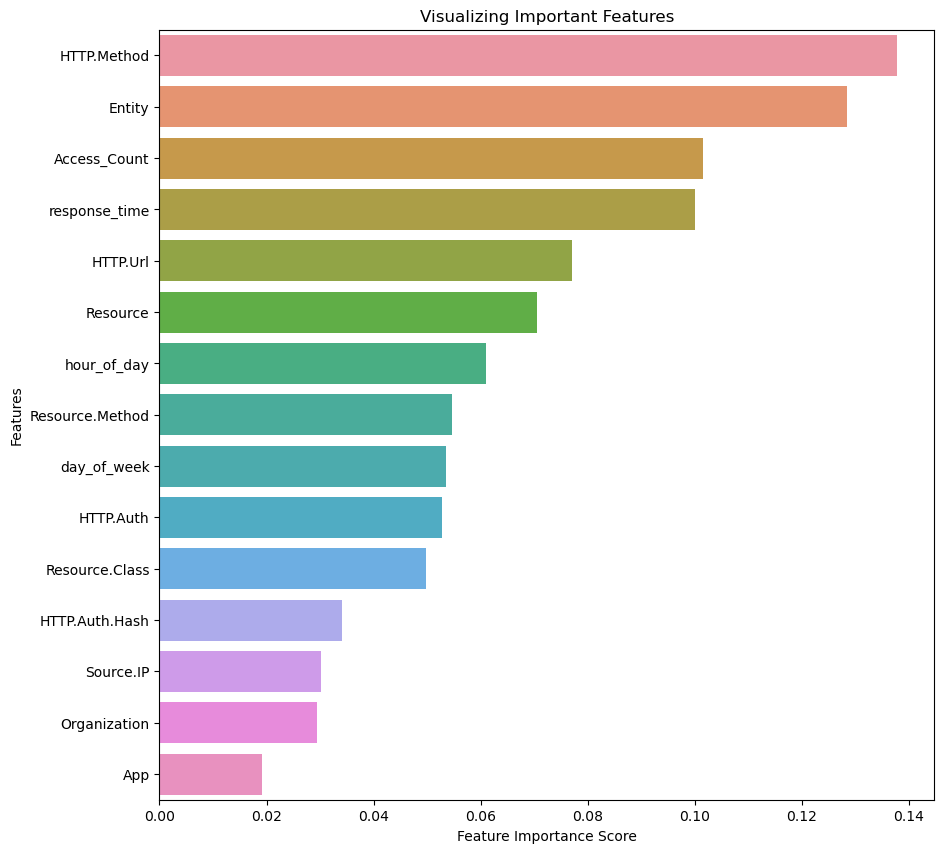

In [7]:
# Visualizing the feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

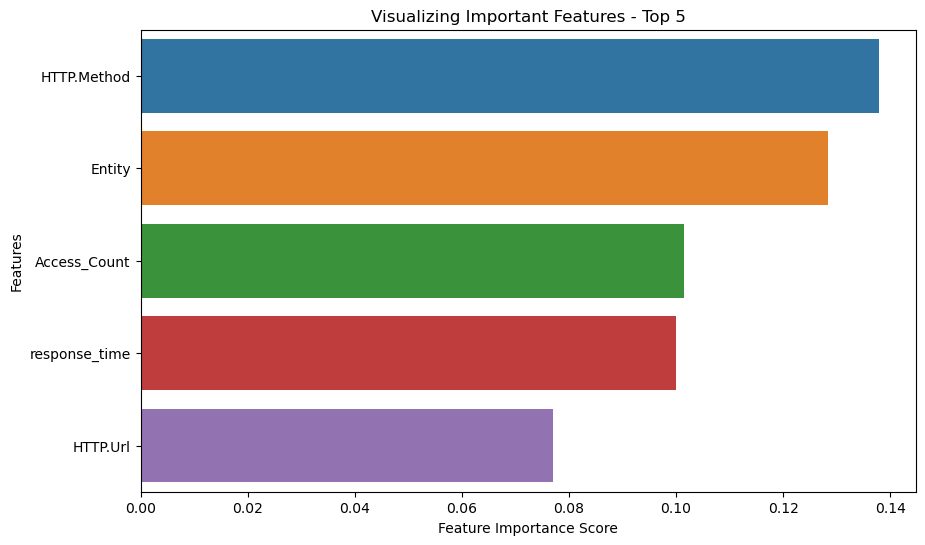

In [8]:
# Select top 5 features
top_5_features = feature_imp[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features, y=top_5_features.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()

# Gradient Boosting Model

[[ 398255   66091]
 [  17464 3385910]]
              precision    recall  f1-score   support

          -1       0.96      0.86      0.91    464346
           1       0.98      0.99      0.99   3403374

    accuracy                           0.98   3867720
   macro avg       0.97      0.93      0.95   3867720
weighted avg       0.98      0.98      0.98   3867720



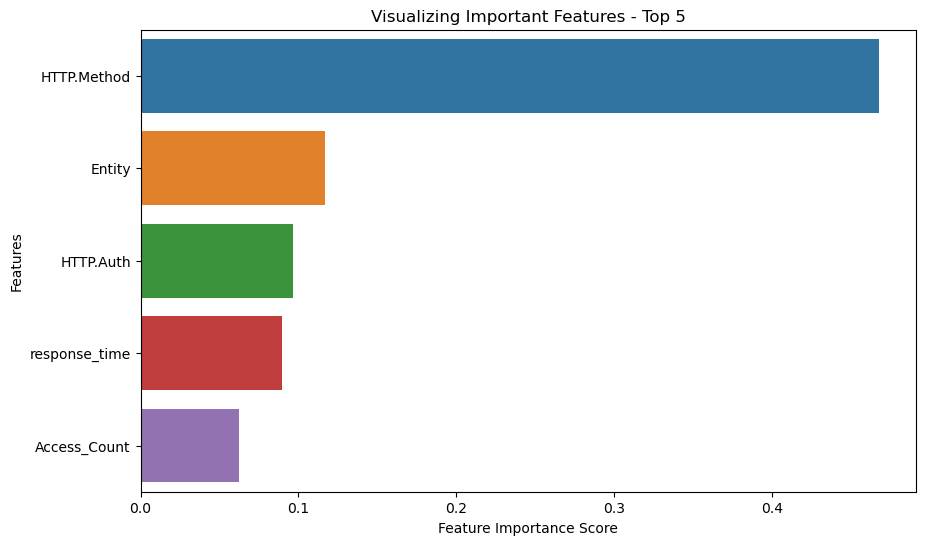

In [23]:
# Separate features (X) and target variable (y)
X = data.drop('anomaly', axis=1)
y = data['anomaly']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
top_5_features = feature_imp[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features, y=top_5_features.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()

[[ 456816    7530]
 [   7169 3396205]]
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98    464346
           1       1.00      1.00      1.00   3403374

    accuracy                           1.00   3867720
   macro avg       0.99      0.99      0.99   3867720
weighted avg       1.00      1.00      1.00   3867720



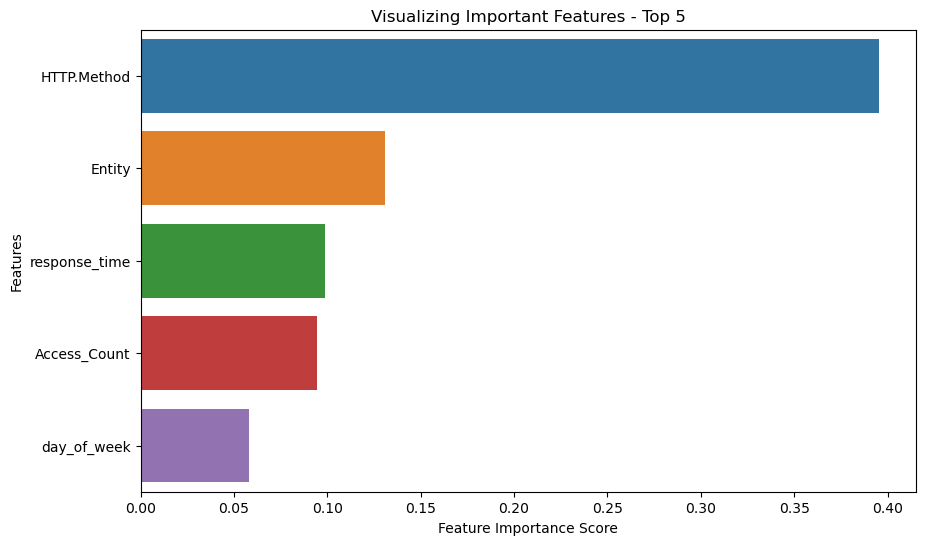

In [24]:
# Separate features (X) and target variable (y)
X = data.drop('anomaly', axis=1)
y = data['anomaly']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Feature Importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
top_5_features = feature_imp[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features, y=top_5_features.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()

# See the precentage of the anomaly

In [2]:
anomaly_distribution = data['anomaly'].value_counts(normalize=True) * 100
print(anomaly_distribution)

 1    88.0
-1    12.0
Name: anomaly, dtype: float64


In [21]:
anomaly_distribution = data['anomaly'].value_counts()
print(anomaly_distribution)


 1    17017968
-1     2320632
Name: anomaly, dtype: int64


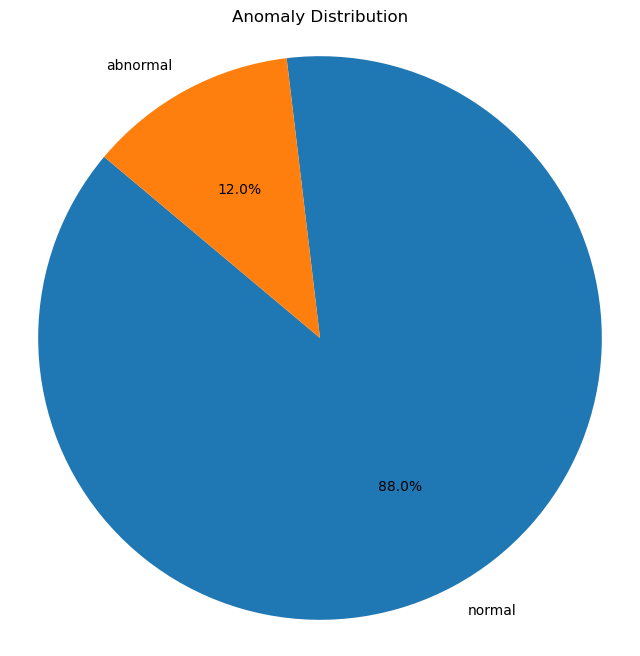

In [5]:
# convert 1 to normal and -1 to abnormal
data['anomaly'] = data['anomaly'].replace({1:'normal', -1:'abnormal'})

# Recalculate the anomaly distribution
anomaly_distribution = data['anomaly'].value_counts(normalize=True) * 100

# Creating the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(anomaly_distribution, labels = anomaly_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Anomaly Distribution')
plt.show()

# Random Forest Model for under sampling data

In [9]:
# Separate features (X) and target variable (y)
X = data.drop('anomaly', axis=1)
y = data['anomaly']

In [10]:
# Define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

# Split the undersampled data into training and testing sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight={-1:4,1:1})
# Fit the model using the undersampled data
clf.fit(X_train_under, y_train_under)

# Predict on the test data
y_pred_under = clf.predict(X_test_under)

# Print confusion matrix
print(confusion_matrix(y_test_under, y_pred_under))

# Print classification report
print(classification_report(y_test_under, y_pred_under))

# Calculate feature importance
feature_imp_under = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp_under)

[[462975    646]
 [  4234 460398]]
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99    463621
           1       1.00      0.99      0.99    464632

    accuracy                           0.99    928253
   macro avg       0.99      0.99      0.99    928253
weighted avg       0.99      0.99      0.99    928253

HTTP.Auth          0.165065
HTTP.Auth.Hash     0.100723
HTTP.Method        0.095442
response_time      0.081202
Access_Count       0.078165
Entity             0.077005
HTTP.Url           0.074737
App                0.057989
Source.IP          0.052947
hour_of_day        0.050673
Resource           0.041251
Resource.Method    0.036582
Resource.Class     0.031239
Organization       0.028642
day_of_week        0.028339
dtype: float64


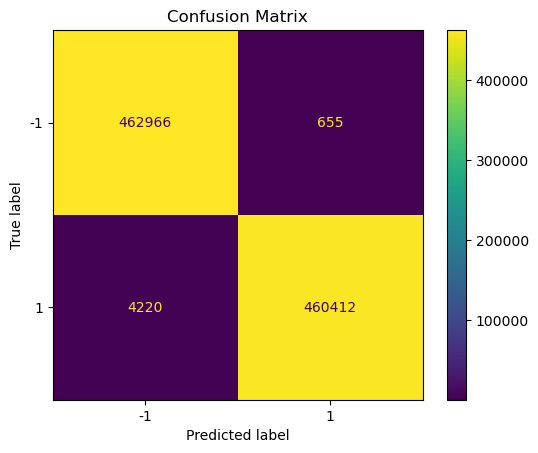

In [15]:
cm1 = confusion_matrix(y_test_under, y_pred_under)
cm_display1 = ConfusionMatrixDisplay(cm1, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

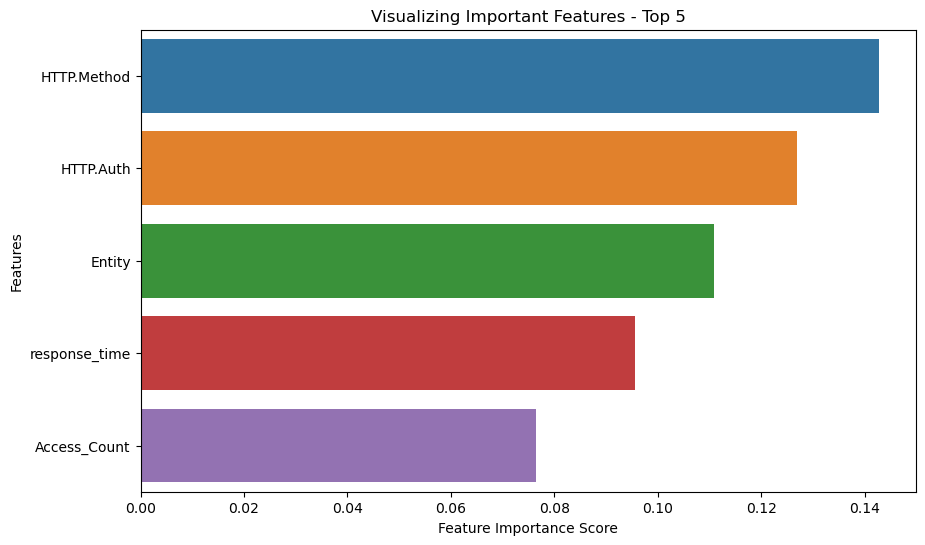

In [16]:
# Select top 5 features
top_5_features1 = feature_imp_under[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features1, y=top_5_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()

# Gradient Boosting Model for under sampling data

In [17]:
# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model using the undersampled data
gb_clf.fit(X_train_under, y_train_under)

# Predict on the test data
y_pred_under_gb = gb_clf.predict(X_test_under)

# Print confusion matrix
print(confusion_matrix(y_test_under, y_pred_under_gb))

# Print classification report
print(classification_report(y_test_under, y_pred_under_gb))

# Calculate feature importance
feature_imp_under_gb = pd.Series(gb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp_under_gb)

[[457067   6554]
 [ 23645 440987]]
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97    463621
           1       0.99      0.95      0.97    464632

    accuracy                           0.97    928253
   macro avg       0.97      0.97      0.97    928253
weighted avg       0.97      0.97      0.97    928253

HTTP.Method        0.332746
HTTP.Auth          0.311056
Entity             0.078709
HTTP.Auth.Hash     0.057504
response_time      0.045733
Source.IP          0.038741
Access_Count       0.038403
Resource.Class     0.026739
hour_of_day        0.018716
Resource           0.012561
Resource.Method    0.011101
day_of_week        0.009953
HTTP.Url           0.009092
App                0.007945
Organization       0.000998
dtype: float64


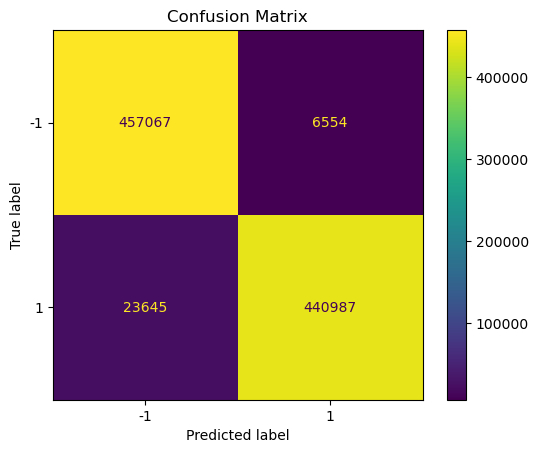

In [18]:
cm2 = confusion_matrix(y_test_under, y_pred_under_gb)
cm_display2 = ConfusionMatrixDisplay(cm2, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

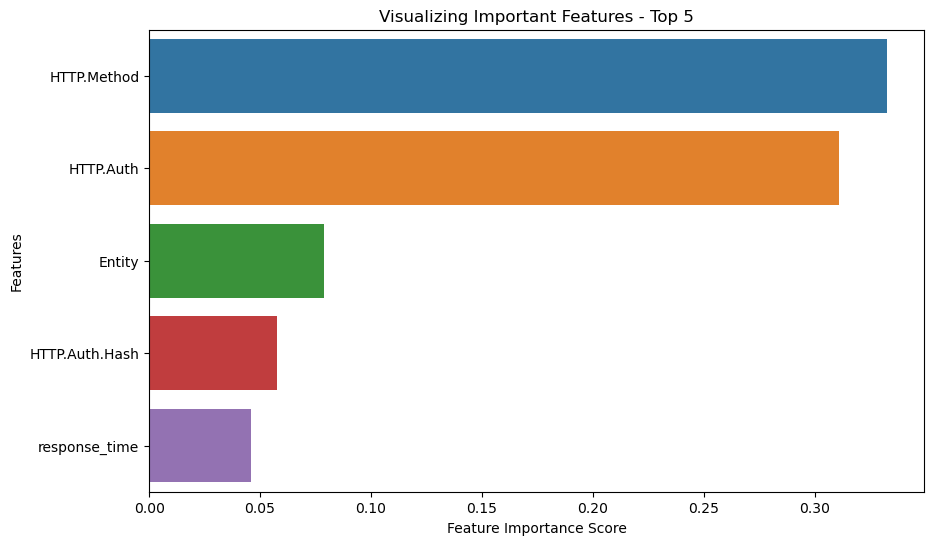

In [19]:
# Select top 5 features
top_5_features2 = feature_imp_under_gb[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features2, y=top_5_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()

# Decision Tree Model for under sampling data

[[460258   3363]
 [  3509 461123]]
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99    463621
           1       0.99      0.99      0.99    464632

    accuracy                           0.99    928253
   macro avg       0.99      0.99      0.99    928253
weighted avg       0.99      0.99      0.99    928253

HTTP.Method        0.361302
HTTP.Auth          0.294699
Access_Count       0.065430
hour_of_day        0.055630
response_time      0.049671
HTTP.Auth.Hash     0.040100
Source.IP          0.037883
day_of_week        0.031015
HTTP.Url           0.028423
Entity             0.018132
App                0.011675
Resource.Class     0.002880
Organization       0.001497
Resource           0.001220
Resource.Method    0.000443
dtype: float64


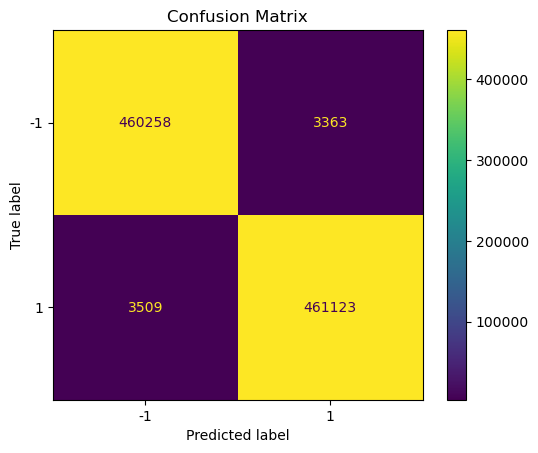

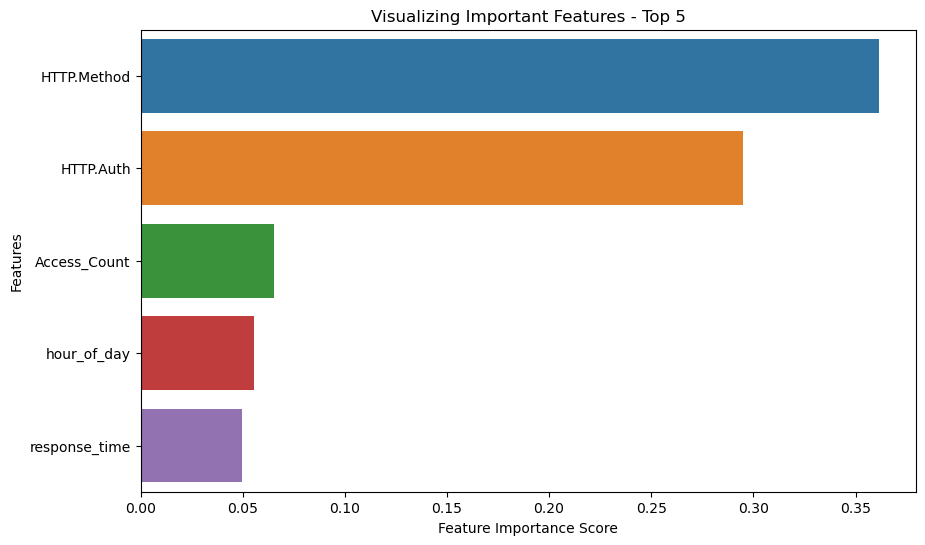

In [25]:
# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model using the undersampled data
dt_clf.fit(X_train_under, y_train_under)

# Predict on the test data
y_pred_under_dt = dt_clf.predict(X_test_under)

# Print confusion matrix
print(confusion_matrix(y_test_under, y_pred_under_dt))

# Print classification report
print(classification_report(y_test_under, y_pred_under_dt))

# Calculate feature importance
feature_imp_under_dt = pd.Series(dt_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp_under_dt)

# Visualize the confusion matrix
cm2 = confusion_matrix(y_test_under, y_pred_under_dt)
cm_display2 = ConfusionMatrixDisplay(cm2, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

# Select top 5 features
top_5_features2 = feature_imp_under_dt[:5]

# Visualizing the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features2, y=top_5_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features - Top 5")
plt.show()